In [63]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from viz_utils import *
from train_utils import *
from input_prep import *
from traj_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Seq from real

In [64]:
sorted(glob.glob("/media/beans/ssd/bespoke_logging/*"))
#sorted(glob.glob("/home/beans/bespoke_logging/*"))

['/media/beans/ssd/bespoke_logging/run_351',
 '/media/beans/ssd/bespoke_logging/run_352',
 '/media/beans/ssd/bespoke_logging/run_353',
 '/media/beans/ssd/bespoke_logging/run_354',
 '/media/beans/ssd/bespoke_logging/run_355',
 '/media/beans/ssd/bespoke_logging/run_356',
 '/media/beans/ssd/bespoke_logging/run_357',
 '/media/beans/ssd/bespoke_logging/run_358',
 '/media/beans/ssd/bespoke_logging/run_359',
 '/media/beans/ssd/bespoke_logging/run_359a',
 '/media/beans/ssd/bespoke_logging/run_359b',
 '/media/beans/ssd/bespoke_logging/run_360',
 '/media/beans/ssd/bespoke_logging/run_361',
 '/media/beans/ssd/bespoke_logging/run_362',
 '/media/beans/ssd/bespoke_logging/run_363',
 '/media/beans/ssd/bespoke_logging/run_364',
 '/media/beans/ssd/bespoke_logging/run_365',
 '/media/beans/ssd/bespoke_logging/run_366',
 '/media/beans/ssd/bespoke_logging/run_367',
 '/media/beans/ssd/bespoke_logging/run_368',
 '/media/beans/ssd/bespoke_logging/run_369',
 '/media/beans/ssd/bespoke_logging/run_370',
 '/media

In [65]:
##run_id = "run_494" # to mid nabq and back via timber trail, silver falls highway, quall, madrona, ev. Cloudy.  
##run_id = "run_498" # back from end nabq via tt, pc, sfh, quall, madrona
run_id = "run_502" # out to nabq start
#run_id = "run_503" # nabq out
#run_id = "run_504" # back from nabq

run_path = f"/media/beans/ssd/bespoke_logging/{run_id}"
#run_path = f"/home/beans/bespoke_logging/{run_id}"

model_stem = "9.21_avg" #"8.18_e34"

In [66]:
aux_paths = sorted(glob.glob(f"{run_path}/aux/*"))
img_paths = sorted(glob.glob(f"{run_path}/img/*"))
car_state_paths = sorted(glob.glob(f"{run_path}/car_state/*"))
m = min([len(aux_paths), len(img_paths), len(car_state_paths)])
len(aux_paths), len(img_paths), len(car_state_paths), m

(15566, 15566, 15566, 15566)

In [67]:
s, e = 0, -100 #-100 #9400, 11_400 #4000
#e = m

aux = np.stack([np.load(f) for f in aux_paths[s:e]]).astype(np.float16)
img = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/img/*"))[s:e]]).astype(np.uint8)
car_state = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/car_state/*"))[s:e]])#.astype(np.float16)

steer_angle = np.radians(car_state[:,0] / (STEER_RATIO)) #*-1  
tire_angle_rad = steer_angle *-1
img.shape, aux.shape, car_state.shape

((15466, 120, 640, 3), (15466, 5), (15466, 16))

In [68]:
#img = img[:,20:,:,:]
img.shape

(15466, 120, 640, 3)

In [69]:
commanded_torque = car_state[:, 7]

array([8.3000e+01, 1.6500e+02, 1.2160e+03, 1.2395e+04, 1.3090e+03,
       2.6500e+02, 1.3000e+01, 1.1000e+01, 5.0000e+00, 4.0000e+00])

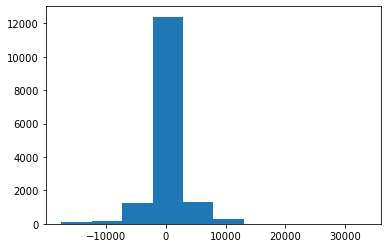

In [70]:
plt.hist(commanded_torque)[0]

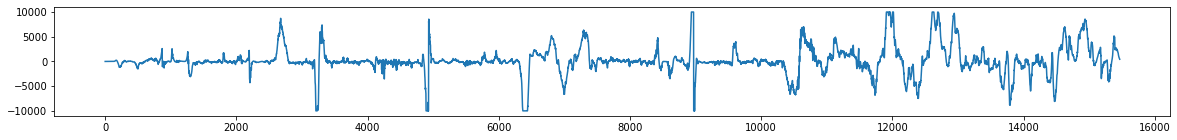

In [71]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_torque, -10_000, 10_000))

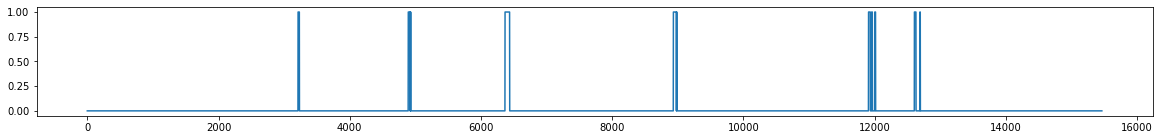

In [72]:
# abs torque limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 9])

array([1.000e+00, 0.000e+00, 2.000e+00, 7.000e+00, 7.748e+03, 7.697e+03,
       7.000e+00, 2.000e+00, 1.000e+00, 1.000e+00])

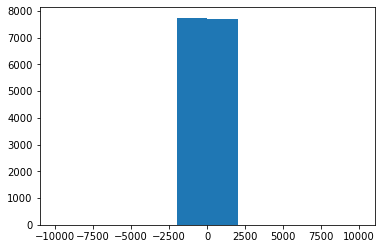

In [73]:
commanded_td = car_state[:, 8]
plt.hist(np.clip(commanded_td, -10_000, 10_000))[0]

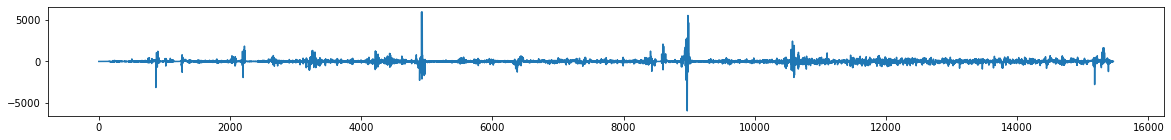

In [74]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_td, -6000, 6000))

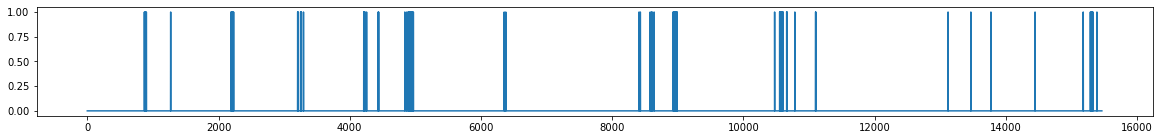

In [75]:
# Td limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 10])

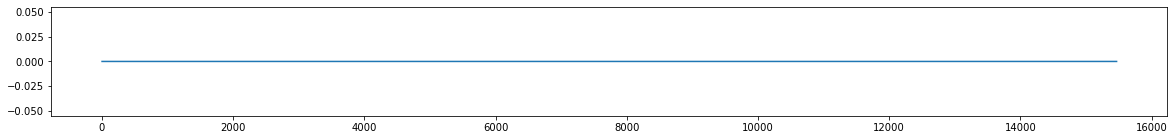

In [76]:
# interesting note
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 11])

In [77]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(car_state[:, 10], width=900, height=400)
fig.show()

In [78]:
#plt.imshow(img[15_750])

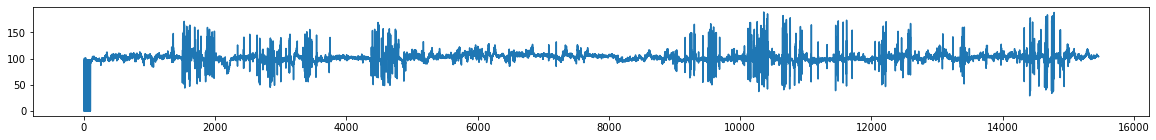

In [79]:
# seeing if cam is too slow, ie if we ever have repeated imgs

diffs = []
for i in range(len(img)-1):
    diff = (img[i] - img[i+1]).mean()
    diffs.append(diff)
    
# whether or not image is same as prev img, ie cam is slow. We just don't want to see zeros
plt.figure(figsize=(20,2))
plt.plot(diffs)

(array([9.000e+00, 4.400e+01, 7.323e+03, 0.000e+00, 5.358e+03, 1.781e+03,
        0.000e+00, 7.240e+02, 1.490e+02, 0.000e+00, 4.000e+01, 1.900e+01,
        9.000e+00, 0.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ,
        22.7, 23.4, 24.1, 24.8, 25.5, 26.2, 26.9, 27.6, 28.3, 29. ]),
 <BarContainer object of 20 artists>)

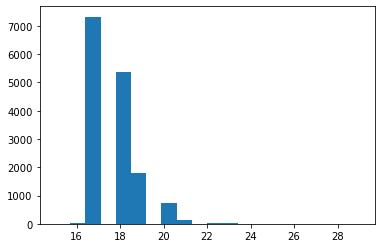

In [80]:
# timespan btwn start to get img, and publish plan, ie the timespan WE have control over
# img staleness
plt.hist(car_state[:,2], bins=20)

In [81]:
b,e = 0, -1
img = img[b:e]
aux = aux[b:e]
car_state = car_state[b:e]
steer_angle = steer_angle[b:e]
img.shape, aux.shape, car_state.shape, steer_angle.shape, #pred.shape

((15465, 120, 640, 3), (15465, 5), (15465, 16), (15465,))

(array([ 267.,  383.,  446.,  619., 7232., 4866.,  519.,  507.,  523.,
         103.]),
 array([-7133.92487574, -5713.65486331, -4293.38485088, -2873.11483846,
        -1452.84482603,   -32.5748136 ,  1387.69519882,  2807.96521125,
         4228.23522367,  5648.5052361 ,  7068.77524853]),
 <BarContainer object of 10 artists>)

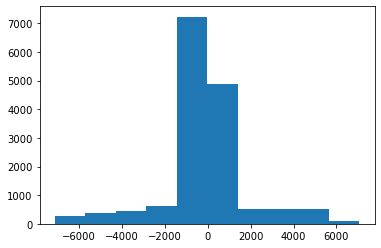

In [82]:
torque = np.degrees(steer_angle) * (aux[:,2]**2)
plt.hist(torque)

(array([1.0000e+01, 4.5000e+01, 5.0000e+02, 1.2712e+04, 1.9570e+03,
        2.0800e+02, 2.4000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-494.85000038, -362.90000033, -230.95000029,  -99.00000024,
          32.94999981,  164.89999986,  296.8499999 ,  428.79999995,
         560.75      ,  692.70000005,  824.6500001 ]),
 <BarContainer object of 10 artists>)

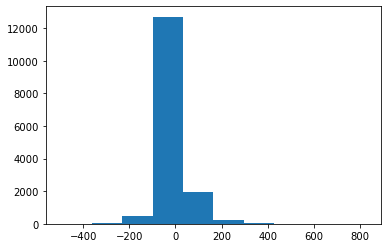

In [83]:
plt.hist(torque[1:]-torque[:-1])

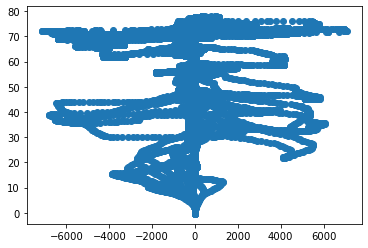

In [84]:
plt.scatter(torque, aux[:,2])

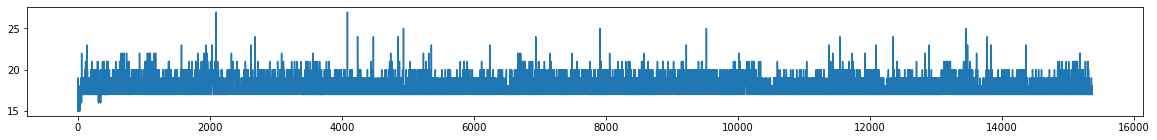

In [85]:
# img staleness
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,2])

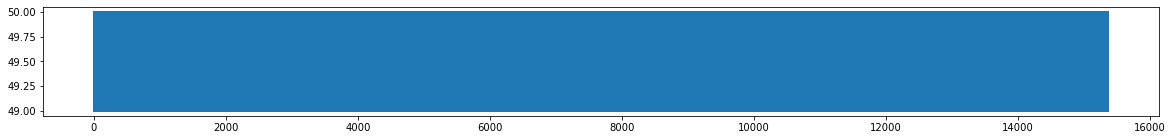

In [86]:
# loop duration
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,3])

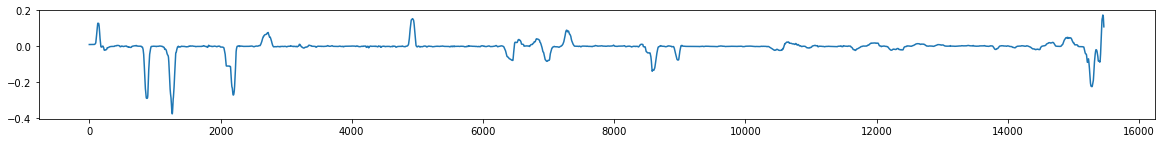

In [87]:
# steer angle
plt.figure(figsize=(20,2))
plt.plot(steer_angle)

In [88]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=range(len(steer_angle)), y=steer_angle, width=900, height=400)
fig.show()

(array([   22.,    68.,   104.,    69.,   183.,   463., 12679.,  1576.,
          191.,   110.]),
 array([-0.37764563, -0.32249323, -0.26734082, -0.21218842, -0.15703601,
        -0.10188361, -0.0467312 ,  0.0084212 ,  0.06357361,  0.11872602,
         0.17387842]),
 <BarContainer object of 10 artists>)

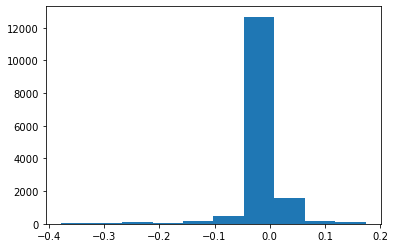

In [89]:
plt.hist(steer_angle)

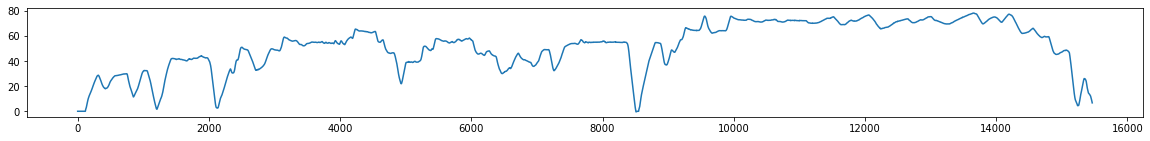

In [90]:
# speed
plt.figure(figsize=(20,2))
plt.plot(aux[:,2])

(array([ 431.,  427.,  551.,  849.,  998., 2085., 2043., 2487., 1825.,
        3769.]),
 array([-0.4722,  7.375 , 15.22  , 23.06  , 30.92  , 38.75  , 46.62  ,
        54.47  , 62.3   , 70.1   , 78.    ], dtype=float16),
 <BarContainer object of 10 artists>)

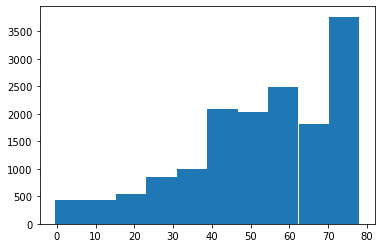

In [91]:
# speed
plt.hist(aux[:,2])

In [92]:
"""import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)
#fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[0, 12])
fig.show()
"""
# The speed you can go is a linear fn of sqrt(1/curvature), steer_angle is a linear fn of curvature, given wheelbase

'import plotly.express as px\nimport plotly.graph_objects as go\n\nfig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)\n#fig.update_xaxes(range=[0, 50])\nfig.update_yaxes(range=[0, 12])\nfig.show()\n'

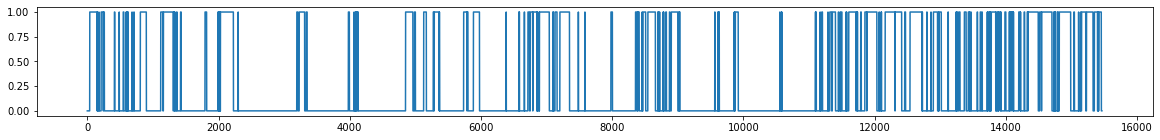

In [93]:
# steeringWheelPressed
plt.figure(figsize=(20,2))
plt.plot(car_state[:,4])

(array([ 7429242.,   346626.,  2013682.,  3941881.,  6782489., 11649958.,
        18054995.,  7057707.,  1151994.,  1014626.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

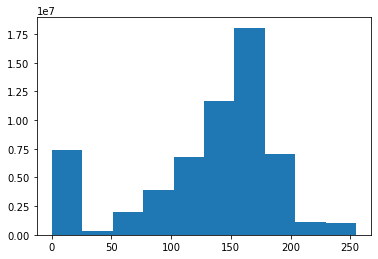

In [94]:
plt.hist(img[::20,:,:,2].flatten())

In [95]:
img.mean()

139.85590899477313

In [96]:
"""for i in range(len(img)):
    img[i] = gamma_correct_auto(img[i])"""

'for i in range(len(img)):\n    img[i] = gamma_correct_auto(img[i])'

<BarContainer object of 10 artists>

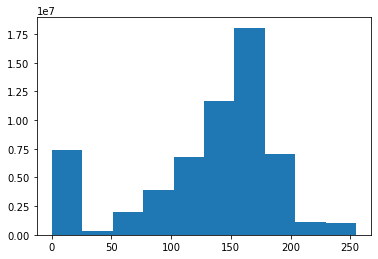

In [97]:
plt.hist(img[::20,:,:,2].flatten())[2]

In [98]:
"""for i in range(len(img)):
    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    
    aux[i, 2] = 80"""

'for i in range(len(img)):\n    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    \n    aux[i, 2] = 80'

In [99]:
img.shape

(15465, 120, 640, 3)

In [100]:
aux[:,0] = 0 #-1.0 #-.5
aux[:,1] = 0 #.5

In [101]:
aux.shape

(15465, 5)

In [102]:
rollout_data = make_vid(run_id, model_stem, img, aux)

(15465, 30) (15465, 1, 15, 80) (15465, 1, 15, 80)
240 690 3


/home/beans/bespoke/viz_utils.py:59: RuntimeWarning:

invalid value encountered in true_divide



Made vid!


In [103]:
wp_angles_all, wp_headings_all, wp_curvatures_all, obsnet_outs, cnn_activations, cnn_grads, rnn_activations, rnn_grads = rollout_data

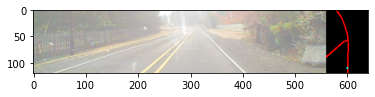

In [104]:
plt.imshow(img[11_800])

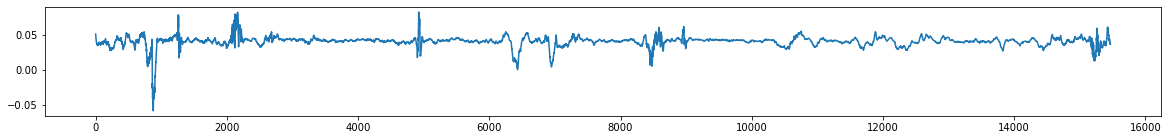

In [105]:
# pitch
plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,1])

In [106]:
obsnet_outs[:,1][:].mean()

0.04044

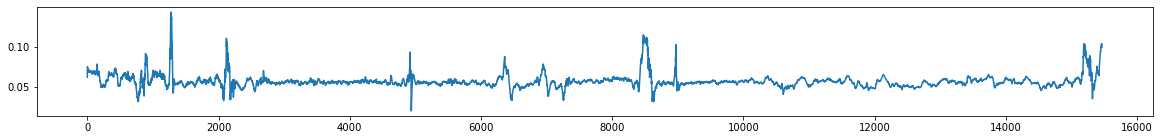

In [107]:
# yaw
plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,2])

In [108]:
obsnet_outs[:,2][:15_000].mean()

0.05682

In [109]:
%%time
combine_vids(model_stem, "9.19_avg", run_id)

combined!
CPU times: user 44.2 s, sys: 403 ms, total: 44.6 s
Wall time: 44.6 s
